In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalize image pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#augment images
datagen = ImageDataGenerator(
    zoom_range= (0.5,1.5),
    width_shift_range=(-5,5),
    height_shift_range=(-5,5),
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [ ]:
train_datagen = datagen.flow(x_train, y_train, batch_size=32,subset='training')
test_datagen = datagen.flow(x_train, y_train, batch_size=8, subset='validation')

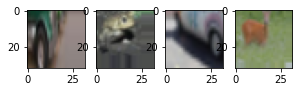

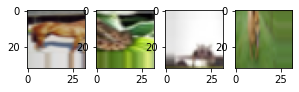

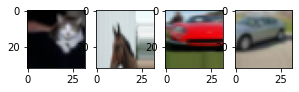

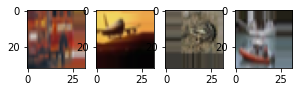

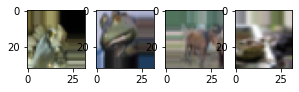

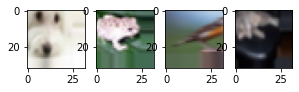

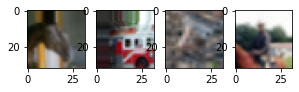

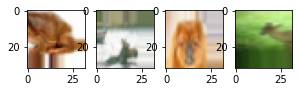

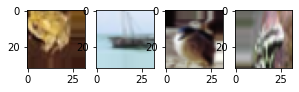

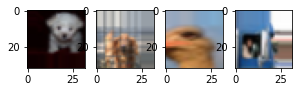

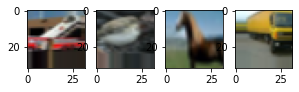

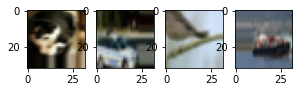

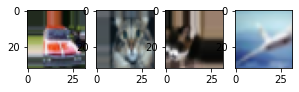

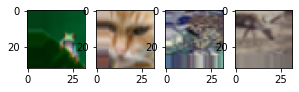

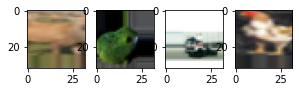

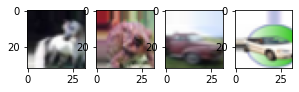

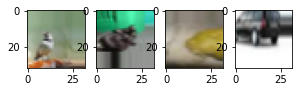

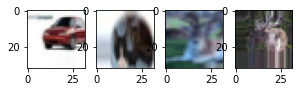

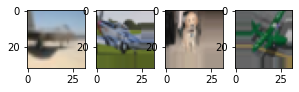

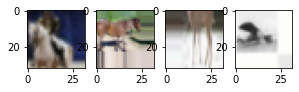

In [ ]:
from matplotlib import pyplot
g = 0
#show augmented images
for X_batch, y_batch in train_datagen:
  for i in range(4):
    pyplot.subplot(255 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  g += 1
  if g == 20:
    break

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

#build model
# For reproducibility
np.random.seed(1000)

# Create the model
model = Sequential()
model.add(Conv2D(64, (7,7), strides=(1,1), padding='same', use_bias=False, input_shape=(32,32,3)))
# model.add(BatchNormalization())
# model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Dropout(0.25))

model.add(Conv2D(192, (3,3), strides=(1,1), padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Dropout(0.25))

model.add(Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))

model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))

model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate = 0.01),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9408      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 192)       110592    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 192)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 1024)        1769472   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 1024)       0

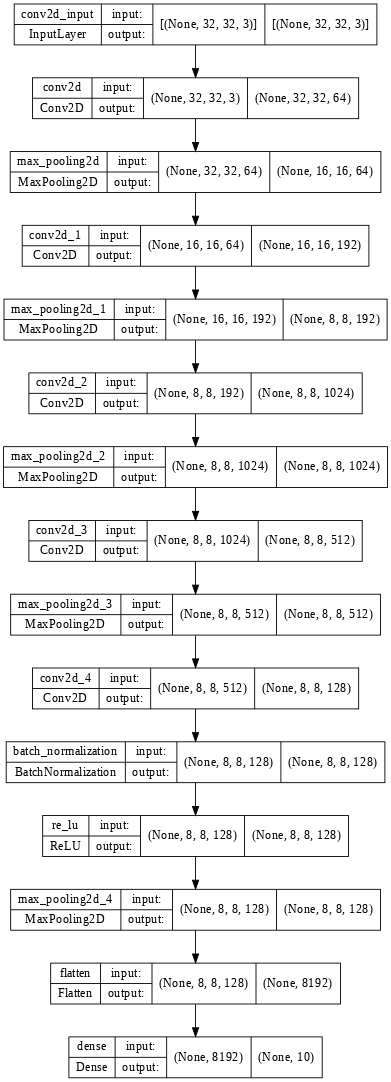

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [ ]:
filepath = "/content/drive/MyDrive/Fund_of_AI_models/custom_2D_cnn.h5"
model = tf.keras.models.load_model(filepath)

In [ ]:
from keras.callbacks import ModelCheckpoint

# define the checkpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_freq = 'epoch')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(train_datagen ,batch_size=20,epochs=500,validation_data=test_datagen, shuffle=True, callbacks=callbacks_list)

Epoch 1/500
1250/1250 [==============================] - ETA: 0s - loss: 0.2570 - acc: 0.9119
Epoch 1: val_acc improved from -inf to 0.80590, saving model to /content/drive/MyDrive/Fund_of_AI_models/custom_2D_cnn.h5
1250/1250 [==============================] - 3124s 2s/step - loss: 0.2570 - acc: 0.9119 - val_loss: 0.6555 - val_acc: 0.8059
Epoch 2/500
1250/1250 [==============================] - ETA: 0s - loss: 0.2537 - acc: 0.9125
Epoch 2: val_acc did not improve from 0.80590
1250/1250 [==============================] - 3164s 3s/step - loss: 0.2537 - acc: 0.9125 - val_loss: 0.6562 - val_acc: 0.8042
Epoch 3/500
1250/1250 [==============================] - ETA: 0s - loss: 0.2499 - acc: 0.9145
Epoch 3: val_acc did not improve from 0.80590
1250/1250 [==============================] - 3088s 2s/step - loss: 0.2499 - acc: 0.9145 - val_loss: 0.6994 - val_acc: 0.7995
Epoch 4/500
1250/1250 [==============================] - ETA: 0s - loss: 0.2495 - acc: 0.9136
Epoch 4: val_acc did not improve fr

KeyboardInterrupt: ignored

In [ ]:
model = tf.keras.models.load_model(filepath)

In [ ]:
#get validation accuracy on raw untoucehed test dataset
model.evaluate(x_test, y_test)

313/313 [==============================] - 150s 477ms/step - loss: 0.6601 - acc: 0.8404


[0.660081148147583, 0.840399980545044]

In [ ]:
#draft the graph for training and validation loss/accuracy
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# model.save("/content/drive/MyDrive/Fund_of_AI_models/custom_2Dcnn.h5",  save_format="h5")

In [14]:
#get accuracy on dataset with augmented images
val_datagen = datagen.flow(x_test, y_test, batch_size=8)
model.evaluate(val_datagen)

1250/1250 [==============================] - 163s 130ms/step - loss: 0.6746 - acc: 0.8034


[0.6745631098747253, 0.8033999800682068]

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
predict_x=model.predict(x_test)
# print(predict_x)
predictions=np.argmax(predict_x, axis = 1)
# print(predictions)
print(classification_report(np.argmax(y_test, axis=1),predictions))
print(confusion_matrix(np.argmax(y_test, axis=1),predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.85      0.96      0.90      1000
           2       0.80      0.81      0.80      1000
           3       0.81      0.61      0.69      1000
           4       0.88      0.82      0.85      1000
           5       0.84      0.72      0.78      1000
           6       0.73      0.95      0.82      1000
           7       0.86      0.93      0.89      1000
           8       0.97      0.84      0.90      1000
           9       0.85      0.91      0.88      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[869  15  34   5   4   4  10  11  10  38]
 [  2 959   4   1   0   0   0   0   1  33]
 [ 27   8 806  21  25  15  69  20   4   5]
 [ 14  30  56 606  34  89 119  29   5  18]
 [  8   2  29  11 823   8  74  41   0   4]
 [  5   6  35  80  34 720 